In [105]:
import numpy as np
import scipy as sp
import pandas as pd
import time

In [92]:
EPS = 1e-10

def generate_matrix(n):
    np.random.seed(0)
    return np.random.rand(n, n) * 2


def generate_vector(n):
    np.random.seed(0)
    return np.random.rand(n) * 2

In [93]:
def solve_lu(A, b):
    lu, piv = sp.linalg.lu_factor(A)
    return sp.linalg.lu_solve((lu, piv), b)


def test_lu(n):
    A = generate_matrix(n)
    b = generate_vector(n)

    start = time.time()
    x = solve_lu(A, b)
    elapsed = time.time() - start

    if not np.allclose(A @ x, b, atol=EPS):
        raise ValueError("LU decomposition failed")
    
    return elapsed

In [97]:
def solve_inv(A, b):
    inv = np.linalg.inv(A)
    return inv, inv @ b


def test_inv(n):
    A = generate_matrix(n)
    b = generate_vector(n)

    start = time.time()
    inv, x = solve_inv(A, b)
    elapsed = time.time() - start

    if not np.allclose(A@inv, np.eye(n), atol=EPS):
        raise ValueError("A*inv(A) != I")

    if not np.allclose(inv@A, np.eye(n), atol=EPS):
        raise ValueError("inv(A)*A != I")

    if not np.allclose(A @ x, b, atol=EPS):
        raise ValueError("Inverse failed")

    return elapsed

In [98]:
def solve_qr(A, b):
    Q, R = np.linalg.qr(A)
    return np.linalg.solve(R, Q.T @ b)

def test_qr(n):
    A = generate_matrix(n)
    b = generate_vector(n)

    start = time.time()
    x = solve_qr(A, b)
    elapsed = time.time() - start

    if not np.allclose(A @ x, b, atol=EPS):
        raise ValueError("QR decomposition failed")

    return elapsed

In [119]:
runs = 500

df = pd.DataFrame()
df['n'] = [10, 25, 50, 75, 100]
df['LU'] = [np.mean([test_lu(n) for _ in range(runs)]) for n in df['n']]
df['INV'] = [np.mean([test_inv(n) for _ in range(runs)]) for n in df['n']]
df['QR'] = [np.mean([test_qr(n) for _ in range(runs)]) for n in df['n']]

df

,n,LU,INV,QR
0,10,0.000038,0.000391,0.000110
1,25,0.000035,0.000344,0.001293
2,50,0.000058,0.000445,0.001367
3,75,0.000093,0.000988,0.002448
4,100,0.007530,0.003505,0.003298


In [113]:
import seaborn as sns

<Axes: xlabel='n', ylabel='LU'>

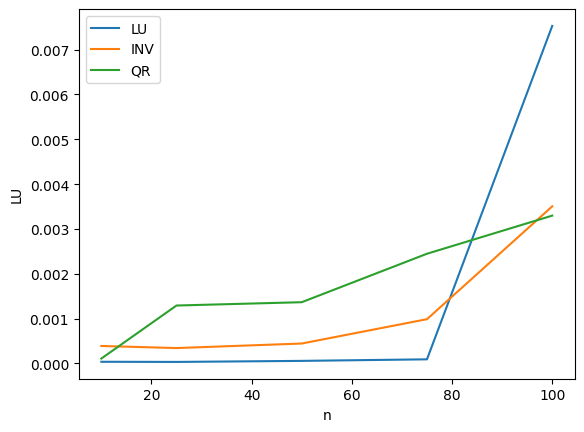

In [120]:
sns.lineplot(data=df, x='n', y='LU', label='LU')
sns.lineplot(data=df, x='n', y='INV', label='INV')
sns.lineplot(data=df, x='n', y='QR', label='QR')

